In [1]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [2]:
scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [4]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


<Axes: xlabel='A', ylabel='B'>

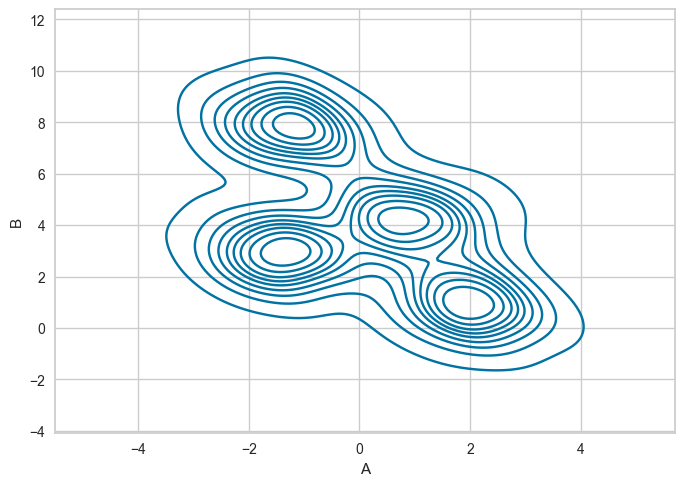

In [5]:
# Density Plot
sns.kdeplot(data=df, x='A', y='B')

In [7]:
estimate_bandwidth(X)

2.822735629625506

In [8]:
model = MeanShift()
labels = model.fit_predict(X)

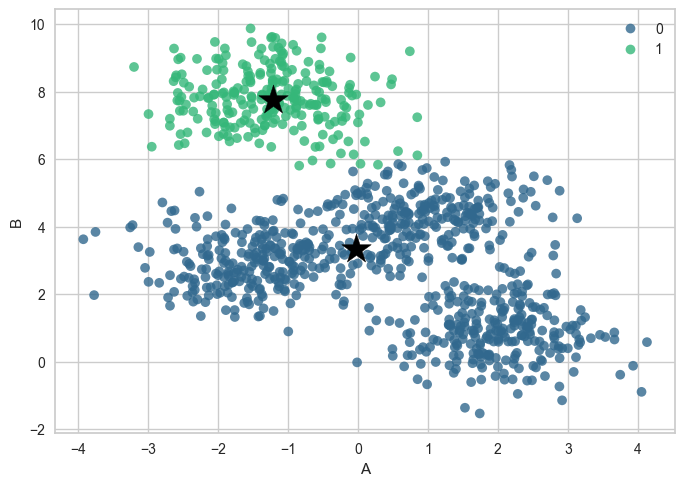

In [15]:
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.cluster_centers_.T, marker='*', s=500, c='black')


In [17]:
@interact(bandwidth=(0.1, 3, 0.01))
def custom_meanshift(bandwidth):
    model = MeanShift(bandwidth=bandwidth, cluster_all=False)
    labels = model.fit_predict(X)
    ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
    ax.scatter(*model.cluster_centers_.T, marker='*', s=500, c='black')


interactive(children=(FloatSlider(value=1.55, description='bandwidth', max=3.0, min=0.1, step=0.01), Output())…